# Data Mining Course Project on Videogame Sales
## Samuel Ramirez

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster
from apyori import apriori
data = pd.read_csv(r"C:\Users\sammy\Desktop\vgsales.csv")
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head(15)

Number of instances = 16598
Number of attributes = 11


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Data Preprocessing
## Remove Class attributes

In [2]:
data = data.drop(['Rank'], axis=1) 
data = data.drop(['Name'], axis=1) 
data.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Fill in Missing Data

#### Here I check for missing data in each attribute.

In [3]:
data.isnull().sum() 

Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Here I fill in the missing values in Year with the mean value for that attribute based on its other values. 

In [4]:
data['Year'] = data['Year'].fillna(data['Year'].mean())
data.isnull().sum()  

Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

#### Here I fill in the missing data for Publisher with a blank value.

In [5]:
data.Publisher = data.Publisher.fillna('')
data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Remove Duplicate Data

In [6]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 258


In [7]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 16598
Number of rows after discarding duplicates = 16340


# Data Exploration

## Summary Statistics

In [8]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

Year:
	 Mean = 2006.41
	 Standard deviation = 5.78
	 Minimum = 1980.00
	 Maximum = 2020.00
NA_Sales:
	 Mean = 0.26
	 Standard deviation = 0.82
	 Minimum = 0.00
	 Maximum = 41.49
EU_Sales:
	 Mean = 0.15
	 Standard deviation = 0.51
	 Minimum = 0.00
	 Maximum = 29.02
JP_Sales:
	 Mean = 0.08
	 Standard deviation = 0.31
	 Minimum = 0.00
	 Maximum = 10.22
Other_Sales:
	 Mean = 0.05
	 Standard deviation = 0.19
	 Minimum = 0.00
	 Maximum = 10.57
Global_Sales:
	 Mean = 0.54
	 Standard deviation = 1.56
	 Minimum = 0.01
	 Maximum = 82.74


### This dataset records videogames sold over the past 40 years from 1980-2020 and these statistics show that North America had the highest videogame sales followed by Europe. Japan came third in videogame sales with other regions coming in fourth.

In [9]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### The Nintendo DS had the most videogames sold followed closely by the PS2.

In [10]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

### Action was the most popular genre of videogame by a landslide. The sports genre came in second.

In [11]:
data['Publisher'].value_counts().head(30)

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

### The publisher that developed the most videogames is Electronic Arts followed by Activision.

In [12]:
data2=data.drop(['Year', 'Global_Sales', 'Publisher', 'Genre', 'Platform'], axis=1)

In [13]:
print('Covariance:')
data2.cov()

Covariance:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,0.666971,0.316850,0.113613,0.097760
EU_Sales,0.316850,0.255380,0.068082,0.069227
JP_Sales,0.113613,0.068082,0.095661,0.016926
Other_Sales,0.097760,0.069227,0.016926,0.035566


In [14]:
print('Correlation:')
data2.corr()

Correlation:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737
EU_Sales,0.767727,1.000000,0.435584,0.726385
JP_Sales,0.449787,0.435584,1.000000,0.290186
Other_Sales,0.634737,0.726385,0.290186,1.000000


### NA and Europe videogame sales have the highest correlation while Japan and other regions have the lowest correlation.

## Data Visualization

### Which decade was the best for videogame sales?

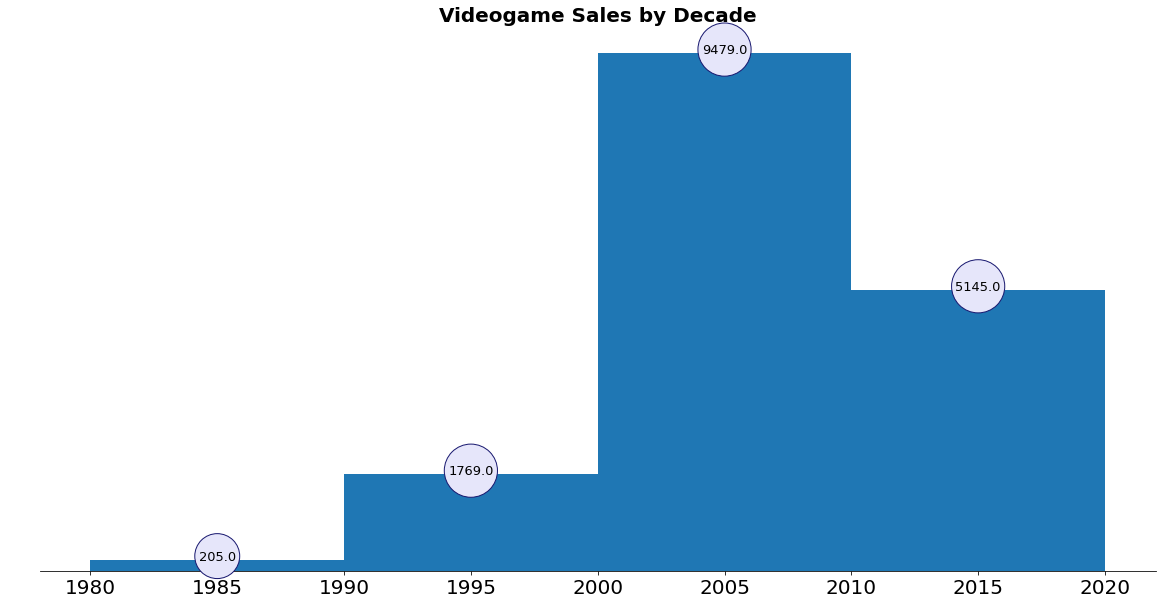

In [15]:
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('Videogame Sales by Decade',fontsize = 20, fontweight = 'bold')
ax=data['Year'].hist(bins=4)
ax.grid(False)

for patch in ax.patches:
 x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
 ax.text(x + width/2, height, f'{height}',
         ha='center', size=13,bbox={'facecolor': 'lavender', 
                                    'boxstyle': 'circle', 
                                    'edgecolor': 'midnightblue'})
    
plt.xticks(fontsize=20)
plt.yticks(color='w')
plt.tick_params(left = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### According to this histogram, the 2000s were the best decade for videogame sales.

### Which region has the highest videogame sales?

(array([1, 2, 3, 4]),
 [Text(1, 0, 'NA_Sales'),
  Text(2, 0, 'EU_Sales'),
  Text(3, 0, 'JP_Sales'),
  Text(4, 0, 'Other_Sales')])

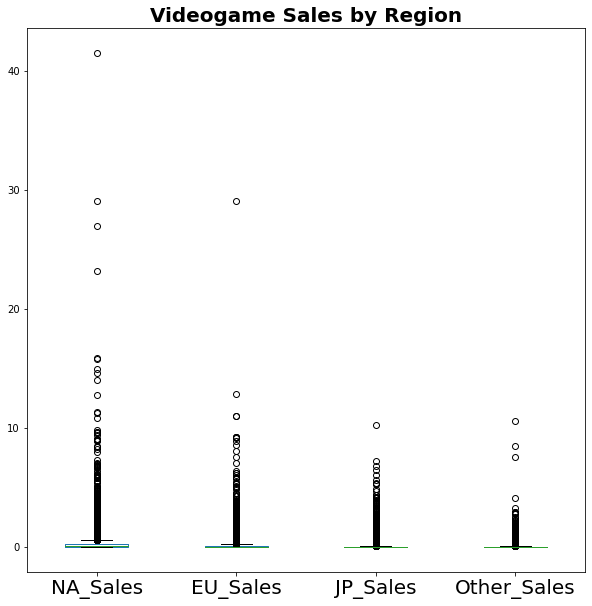

In [16]:
plt.figure(figsize = (10, 10))
plt.title('Videogame Sales by Region',fontsize = 20, fontweight = 'bold')
ax=data2.boxplot()
ax.grid(False)
plt.xticks(fontsize=20)

### According to this boxplot, it appears that North America has the highest videogame sales.

### Which regions have the highest and lowest correlation with each other?

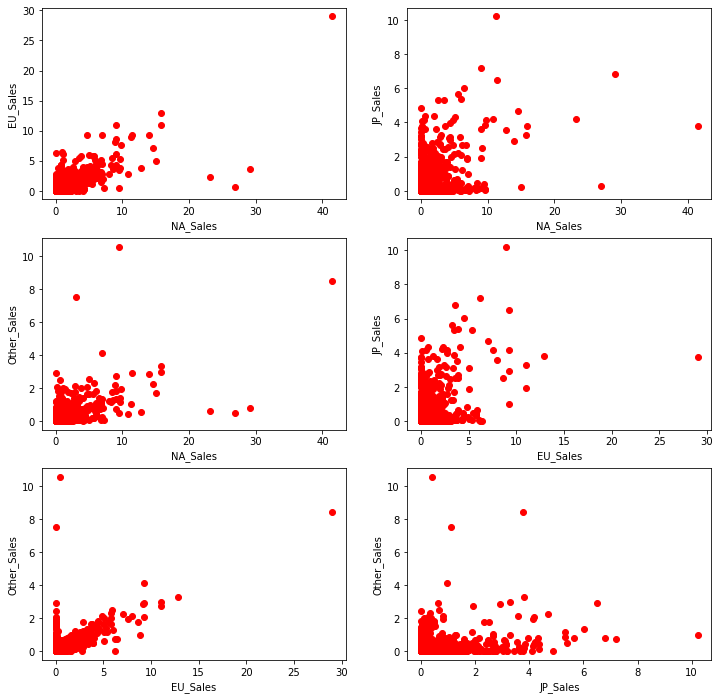

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data2[data2.columns[i]], data[data2.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data2.columns[i])
        axes[ax1][ax2].set_ylabel(data2.columns[j])
        index = index + 1

### According to these plots, it appears that North American videogame sales and European videogame sales have high correlation with each other, meaning that if a videogame in one of the regions does well, it is likely for it to do well in the other region. This also shows that Japan has the lowest correlation amongst the other regions, meaning that if a videogame does well in Japan, that does not necessarily mean it will do well in other regions. 

In [18]:
data2=data.drop(['Year', 'Global_Sales', 'Publisher', 'Platform'], axis=1)

# Data Mining Techniques

# Decision Tree Classifier

### Which attribute is the best predictor for the data set?

#### Here I drop all numerical attributes in order for the Decision Tree Classifier to work

In [19]:
data3 = data.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Year', 'Global_Sales'], axis=1) 

#### Since the decision tree only accepts binary attributes, I convert these three attributes from nominal to binary. 

In [20]:
dataEncoded = pd.get_dummies(data3, columns=['Genre', 'Platform', 'Publisher'])

In [21]:
Genre_Action_count_0, Genre_Action_count_1 = dataEncoded['Genre_Action'].value_counts()

Genre_Action_0 = dataEncoded[dataEncoded['Genre_Action'] == 0]
Genre_Action_1 = dataEncoded[dataEncoded['Genre_Action'] == 1]
print('Genre_Action 0:', Genre_Action_0.shape)
print('Genre_Action 1:', Genre_Action_1.shape)

Genre_Action 0: (13282, 622)
Genre_Action 1: (3316, 622)


#### Since there is a class imbalance here, I use random under-sampling.

In [22]:
Genre_Action_0_under = Genre_Action_0.sample(Genre_Action_count_1)

Genre_Action_test_under = pd.concat([Genre_Action_0_under, Genre_Action_1], axis=0)

print('Genre_Action 0:', Genre_Action_0_under.shape)
print('Genre_Action 1:', Genre_Action_1.shape)
dataEncoded=Genre_Action_test_under

Genre_Action 0: (3316, 622)
Genre_Action 1: (3316, 622)


#### Here I create a training and testing dataset for the decision tree classifier. The training dataset will be used on the test dataset to test the accuracy of the model. 

In [23]:
from sklearn.model_selection import train_test_split
x = dataEncoded.drop(['Genre_Action'], axis=1)
y = dataEncoded['Genre_Action']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4642, 621)
(1990, 621)
(4642,)
(1990,)


In [25]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5) 
myTree = myTree.fit(x_train, y_train)

### Accuracy for the Genre Attribute

In [26]:
predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

Accuracy on test data is 0.80


#### Here I repeat the process I used on the Genre attribute for the Platform attribute using the DS value. 

In [27]:
dataEncoded = pd.get_dummies(data3, columns=['Platform', 'Genre', 'Publisher'])

In [28]:
Platform_DS_count_0, Platform_DS_count_1 = dataEncoded['Platform_DS'].value_counts()

Platform_DS_0 = dataEncoded[dataEncoded['Platform_DS'] == 0]
Platform_DS_1 = dataEncoded[dataEncoded['Platform_DS'] == 1]
print('Platform_DS 0:', Platform_DS_0.shape)
print('Platform_DS 1:', Platform_DS_1.shape)

Platform_DS 0: (14435, 622)
Platform_DS 1: (2163, 622)


In [29]:
Platform_DS_0_under = Platform_DS_0.sample(Platform_DS_count_1)

Platform_DS_test_under = pd.concat([Platform_DS_0_under, Platform_DS_1], axis=0)

print('Platform_DS 0:', Platform_DS_0_under.shape)
print('Platform_DS 1:', Platform_DS_1.shape)
dataEncoded=Platform_DS_test_under

Platform_DS 0: (2163, 622)
Platform_DS 1: (2163, 622)


In [30]:
from sklearn.model_selection import train_test_split
x = dataEncoded.drop(['Platform_DS'], axis=1)
y = dataEncoded['Platform_DS']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3028, 621)
(1298, 621)
(3028,)
(1298,)


In [32]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5) 
myTree = myTree.fit(x_train, y_train)

### Accuracy for the Platform Attribute

In [33]:
predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

Accuracy on test data is 0.77


#### I repeat the process one final time for the Publisher attribute using the Electronic Arts value for Publisher. 

In [34]:
dataEncoded = pd.get_dummies(data3, columns=['Publisher', 'Genre', 'Platform'])

In [35]:
Publisher_Electronic_Arts_count_0, Publisher_Electronic_Arts_count_1 = dataEncoded['Publisher_Electronic Arts'].value_counts()

Publisher_Electronic_Arts_0 = dataEncoded[dataEncoded['Publisher_Electronic Arts'] == 0]
Publisher_Electronic_Arts_1 = dataEncoded[dataEncoded['Publisher_Electronic Arts'] == 1]
print('Publisher_Electronic_Arts 0:', Publisher_Electronic_Arts_0.shape)
print('Publisher_Electronic_Arts 1:', Publisher_Electronic_Arts_1.shape)

Publisher_Electronic_Arts 0: (15247, 622)
Publisher_Electronic_Arts 1: (1351, 622)


In [36]:
Publisher_Electronic_Arts_0_under = Publisher_Electronic_Arts_0.sample(Publisher_Electronic_Arts_count_1)

Publisher_Electronic_Arts_test_under = pd.concat([Publisher_Electronic_Arts_0_under, Publisher_Electronic_Arts_1], axis=0)

print('Publisher_Electronic_Arts 0:', Publisher_Electronic_Arts_0_under.shape)
print('Publisher_Electronic_Arts 1:', Publisher_Electronic_Arts_1.shape)
dataEncoded=Publisher_Electronic_Arts_test_under

Publisher_Electronic_Arts 0: (1351, 622)
Publisher_Electronic_Arts 1: (1351, 622)


In [37]:
from sklearn.model_selection import train_test_split
x = dataEncoded.drop(['Publisher_Electronic Arts'], axis=1)
y = dataEncoded['Publisher_Electronic Arts']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1891, 621)
(811, 621)
(1891,)
(811,)


In [39]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5) 
myTree = myTree.fit(x_train, y_train)

### Accuracy for the Publisher attribute

In [40]:
predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

Accuracy on test data is 0.71


### The Genre value Action had the highest accuracy on the test data out of the three attributes. Thus, Genre is the best predictor for the test data. 

# K-means Clustering
## What cluster does each platform, genre, and publisher belong to?

#### Here I make sure to drop all nominal attributes, leaving only numerical attributes in order for K-means clustering to work.

In [41]:
data2=data2.drop(['Genre'], axis=1)

In [42]:
data2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00
...,...,...,...,...
16593,0.01,0.00,0.00,0.00
16594,0.01,0.00,0.00,0.00
16595,0.00,0.00,0.00,0.00
16596,0.00,0.01,0.00,0.00


#### Here I find the centroid for each cluster and assign all the values to the cluster with the centroid closest to them. 

In [43]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data2)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 2, 2, 2])

In [44]:
k_means.cluster_centers_

array([[ 2.32199021,  1.40350734,  0.45680261,  0.42737357],
       [14.0312    ,  7.138     ,  3.1936    ,  2.332     ],
       [ 0.16408459,  0.08742669,  0.05834336,  0.02991667]])

In [45]:
clusterdataWithLabels = pd.concat((data2, pd.DataFrame(labels)), axis=1)
clusterdataWithLabels.set_axis(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Cluster'], axis=1, inplace = True)
clusterdataWithLabels.sample(20)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
15305,0.00,0.02,0.00,0.00,2
1904,0.28,0.59,0.00,0.22,2
7614,0.16,0.04,0.00,0.00,2
1709,0.52,0.24,0.38,0.04,2
2578,0.43,0.29,0.00,0.08,2
14861,0.02,0.01,0.00,0.00,2
14483,0.03,0.00,0.00,0.00,2
12048,0.00,0.00,0.07,0.00,2
3662,0.22,0.08,0.24,0.01,2
6983,0.17,0.03,0.00,0.03,2


In [46]:
genre = data['Genre']
publisher = data['Publisher']
platform = data['Platform']

#### Here I add back the nominal attributes to the data with the clusters so that I can perform analysis on them.

In [47]:
clusterdataWithLabels['Genre'] = genre
clusterdataWithLabels['Publisher'] = publisher
clusterdataWithLabels['Platform'] = platform

In [48]:
clusterdataWithLabels

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster,Genre,Publisher,Platform
0,41.49,29.02,3.77,8.46,1,Sports,Nintendo,Wii
1,29.08,3.58,6.81,0.77,1,Platform,Nintendo,NES
2,15.85,12.88,3.79,3.31,1,Racing,Nintendo,Wii
3,15.75,11.01,3.28,2.96,1,Sports,Nintendo,Wii
4,11.27,8.89,10.22,1.00,1,Role-Playing,Nintendo,GB
...,...,...,...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,2,Platform,Kemco,GBA
16594,0.01,0.00,0.00,0.00,2,Shooter,Infogrames,GC
16595,0.00,0.00,0.00,0.00,2,Racing,Activision,PS2
16596,0.00,0.01,0.00,0.00,2,Puzzle,7G//AMES,DS


#### Here I compare each region's videogame sales to the clusters.

<AxesSubplot:title={'center':'Other_Sales'}, xlabel='Cluster', ylabel='Other_Sales'>

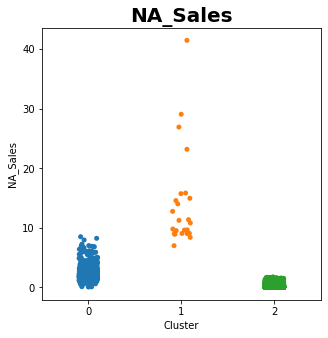

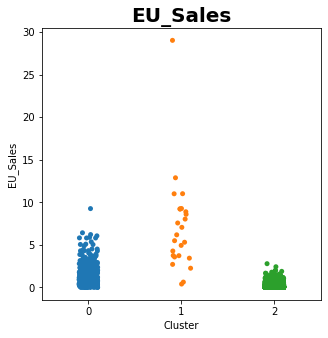

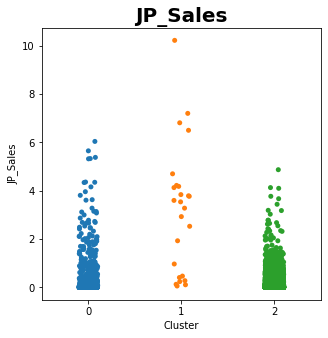

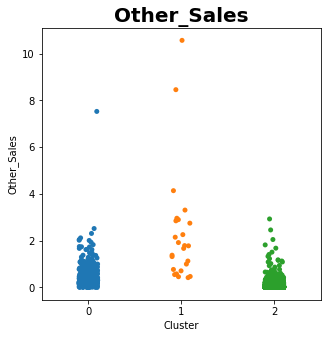

In [49]:
plt.figure(figsize = (5, 5))
plt.title('NA_Sales',fontsize = 20, fontweight = 'bold')

sns.stripplot(x="Cluster",
              y="NA_Sales",
              data=clusterdataWithLabels)


plt.figure(figsize = (5, 5))

plt.title('EU_Sales',fontsize = 20, fontweight = 'bold')
sns.stripplot(x="Cluster",
              y="EU_Sales",
              data=clusterdataWithLabels)


plt.figure(figsize = (5, 5))

plt.title('JP_Sales',fontsize = 20, fontweight = 'bold')
sns.stripplot(x="Cluster",
              y="JP_Sales",
              data=clusterdataWithLabels)


plt.figure(figsize = (5, 5))

plt.title('Other_Sales',fontsize = 20, fontweight = 'bold')
sns.stripplot(x="Cluster",
              y="Other_Sales",
              data=clusterdataWithLabels)

In [50]:
clusterdataWithLabels['Cluster'].value_counts()

2    15960
0      613
1       25
Name: Cluster, dtype: int64

### These clusters can be classified into three different types. Class 2 is moderate sucess, Class 0 is high success, and Class 1 is critical success.

### These scatterplots show me that only North America follows the cluster trend very closely while Europe does to a lesser degree and Japan least of all. 

#### Here I compare each Genre to the clusters.

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

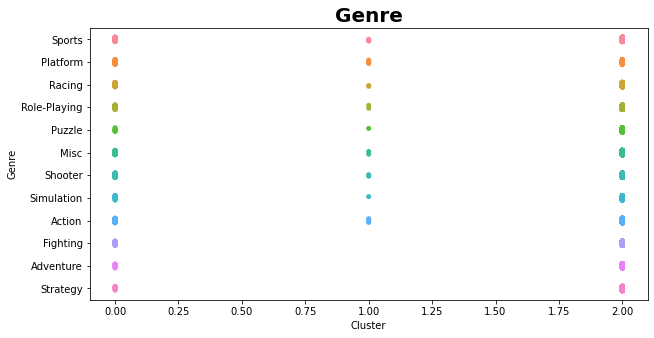

In [51]:
plt.figure(figsize = (10, 5))
plt.title('Genre',fontsize = 20, fontweight = 'bold')

sns.stripplot(x="Cluster",
              y="Genre",
              data=clusterdataWithLabels)
data['Genre'].value_counts()

### This plot shows me that there is a good amount of representation for different Genres in cluster 1. This tells me that the type of Genre of the videogame has little to do with how well it will sell. The only three genres that did not break into cluster 1 was fighting, adventure, and strategy. 

#### Here I compare each platform to the clusters.

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
Name: Platform, dtype: int64

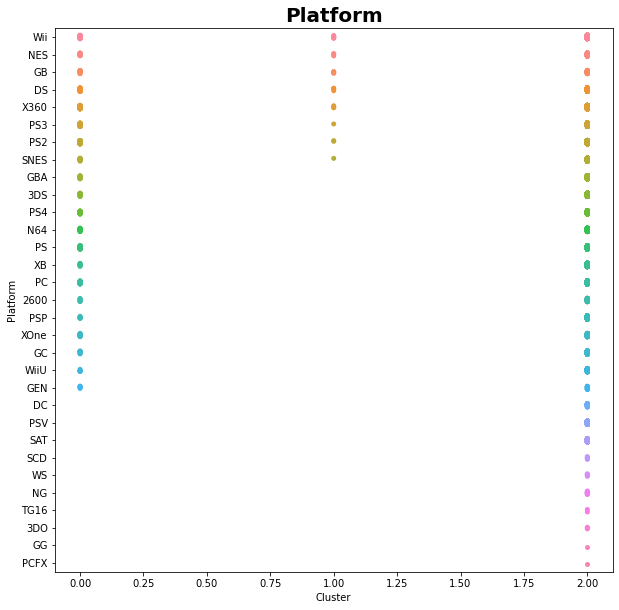

In [52]:
plt.figure(figsize = (10, 10))
plt.title('Platform',fontsize = 20, fontweight = 'bold')

sns.stripplot(x="Cluster",
              y="Platform",
              data=clusterdataWithLabels)
data['Platform'].value_counts().head(22)

### This plot tells me that it is not common for platforms to have a critically high selling videogame. 

#### Here I compare publishers to clusters

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Name: Publisher, dtype: int64

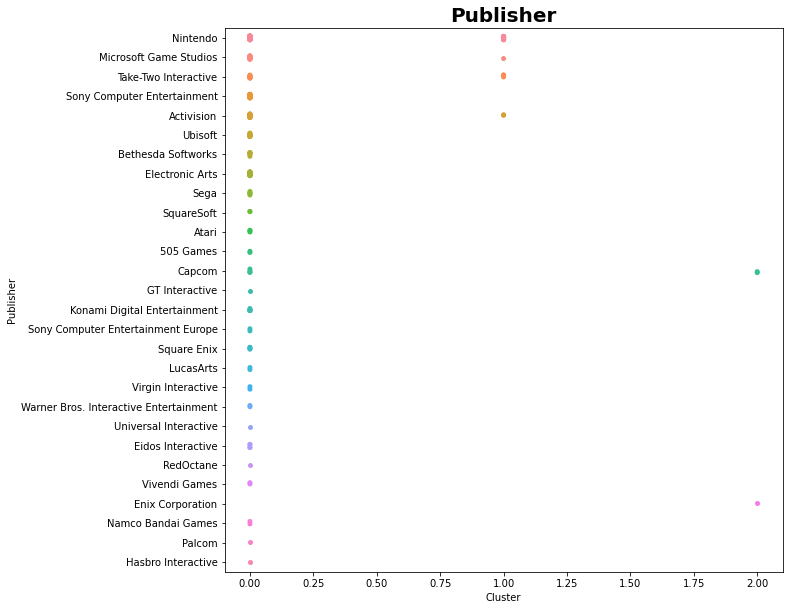

In [53]:
plt.figure(figsize = (10, 10))
plt.title('Publisher',fontsize = 20, fontweight = 'bold')

sns.stripplot(x="Cluster",
              y="Publisher",
              data=clusterdataWithLabels.head(300))
data['Publisher'].value_counts().head(7)

### This plot tells me that out of the hundreds of videogame publishers, only 4 have managed to achieve critical success. This tells me that it is extremely hard to make a smash hit videogame. It is surprising for me to see that even though it is very hard, Nintendo and Take-Two Interactive have managed to do so multiple times. 

# Apriori
## Which combinations of platform, genre, and publisher belong to the top videogame sales?

#### Here I make sure that the data I use for the apriori algorithm uses only nominal attributes since it will not take continuous data. 

In [54]:
data3.head()

,Platform,Genre,Publisher
0,Wii,Sports,Nintendo
1,NES,Platform,Nintendo
2,Wii,Racing,Nintendo
3,Wii,Sports,Nintendo
4,GB,Role-Playing,Nintendo


#### Here I turn the dataset into a list in order for the apriori algorithm to run through it. 

In [55]:
dataList = data3.values.tolist()

#### Since the dataset is so large, I make the support very low, .0006, so we can get an indepth look into the data. To combat this low minimum support, I make the confidence high at .6 in order to not get hundreds of results as well as to see meaningful association rules.

In [56]:
association_rules = apriori(dataList, min_support = 0.0006, min_confidence = 0.6, min_lift = .2)

association_results = list(association_rules)
association_results[-26:]

[RelationRecord(items=frozenset({'Sports', 'PS4', 'Electronic Arts'}), support=0.0009639715628388962, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PS4', 'Electronic Arts'}), items_add=frozenset({'Sports'}), confidence=0.6153846153846154, lift=4.353859269460293)]),
 RelationRecord(items=frozenset({'Falcom Corporation', 'PSP', 'Role-Playing'}), support=0.0006627304494517412, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Falcom Corporation'}), items_add=frozenset({'PSP', 'Role-Playing'}), confidence=0.6875, lift=59.432942708333336), OrderedStatistic(items_base=frozenset({'Falcom Corporation', 'PSP'}), items_add=frozenset({'Role-Playing'}), confidence=0.9166666666666666, lift=10.22502240143369), OrderedStatistic(items_base=frozenset({'Falcom Corporation', 'Role-Playing'}), items_add=frozenset({'PSP'}), confidence=0.7333333333333333, lift=10.034514976641933)]),
 RelationRecord(items=frozenset({'Fighting', 'Ignition Entertainment', 'PS2'}), support=0.000783226894

### These association rules show me a closer look into the data that k-means clustering and the decision tree classifier could not. From this I could see data values that do not appear hundreds of times in the data set yet tells an important detail about the different attributes. For example, I never knew that a company called Nippon Ichi Software specialized in making Role-Playing games for Sony platforms. I also learned that Paradox Interactive made strategy games exclusively for the PC and Kalypso Media also made the majority of its strategy games on the PC. I also learned that on the Sega Saturn, Sega made over 93.75% of the Saturn's sports games. This tells me the Sega Saturn did not have a lot of third party support.

# Comparison among Data Mining Approaches

### In conclusion, each data mining technique revealed new information that could be combined with each other to learn more about the dataset. The decision tree classifier and Apriori algorithm both used the nominal attributes to make comparisons between them and explore their relationships. However, while Apriori required the data to be turned into a list, the decision tree required the nominal attributes to be converted into binary values. K-means clustering was different from the other two algorithms as it focused on the numerical data: videogame sales. From this I learned which publishers, genres, and platforms had videogame sales that sold critically well, and combined this knowledge from the knowledge gained from the decision tree and apriori to make conclusions on the dataset. I learned Nintendo is slow to put out games but has very high quality. I also learned that Nintendo has a trend of having poor third party support, but this changed with the Wii and DS. I also learned that Sony has high third party support and focuses more on putting as much games as possible on their system. I learned that most Publishers focus on one specific genre and that there is a large gap between the top publishers and the average videogame publishers. Therefore, data mining is key to finding new patterns and relationships between data and is an extremely useful tool.